<a href="https://colab.research.google.com/github/maeve70/LEABY-and-GDP/blob/main/LifeExpectancyGDPCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A look at GDP and Life Expectancy at Birth (LEABY) by Country.

Life expectancy data source: https://apps.who.int/gho/data/node.main.688

GDP data: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD

Questions asked:

- What is the avg. LEABY by country?
- Is there a change in LEABY over time?
- Is there a change in GDP over time?
- Is there a correlation between LEABY & GDP in these countries?


In [ ]:
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
#%matplotlib inline
# suppress warnings (warnings do not prevent the code from executing)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
plt.rcParams['figure.dpi'] = 100  # make figures large
%config InlineBackend.figure_format = 'retina'  # make figures crisp

The csv is on my drive but it's easier to access it from github.
file link: https://drive.google.com/file/d/1iqwJthQfK6MpgxiWi61w_N1DzMgXXcsl/view?usp=sharing

pd.read_csv('/content/gdrive/My Drive/Codecademy Colab Notebooks/

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/maeve70/csvfiles/main/all_data.csv')

In [ ]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


Initial basic stats.

In [ ]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [ ]:
df.shape

(96, 4)

In [ ]:
df.isnull().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

Good! no Nulls

Let's rename Life expectancy at birth (years) to LEABY


In [ ]:

#data.rename(columns={'old name':'new name'}, inplace=True)
df.rename(columns={'Life expectancy at birth (years)': 'LEABY'}, inplace=True)


In [ ]:
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


the GDP col is in trillions (ie: e+10, scientific notation 10 decimal places to the right.)

Let's groupby country and see what the average LEABY and GDP is by country.

In [ ]:
df_means = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()
df_means

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Exploratory plots.
Country by GDP...

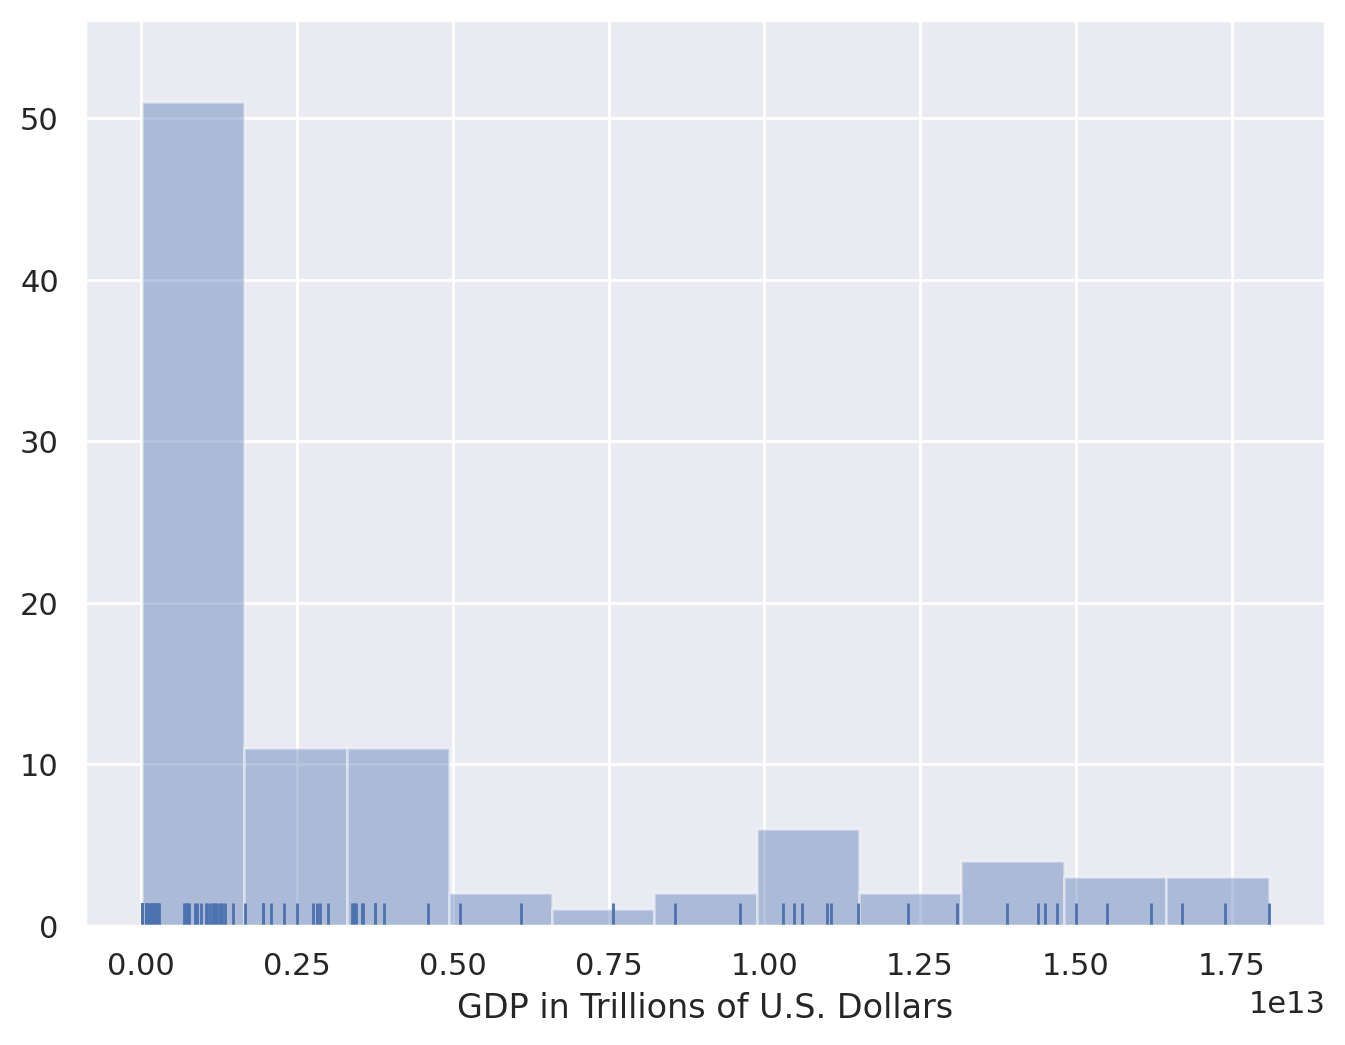

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df.GDP, rug = True, kde=False)
plt.xlabel("GDP in Trillions of U.S. Dollars");


right skewed.

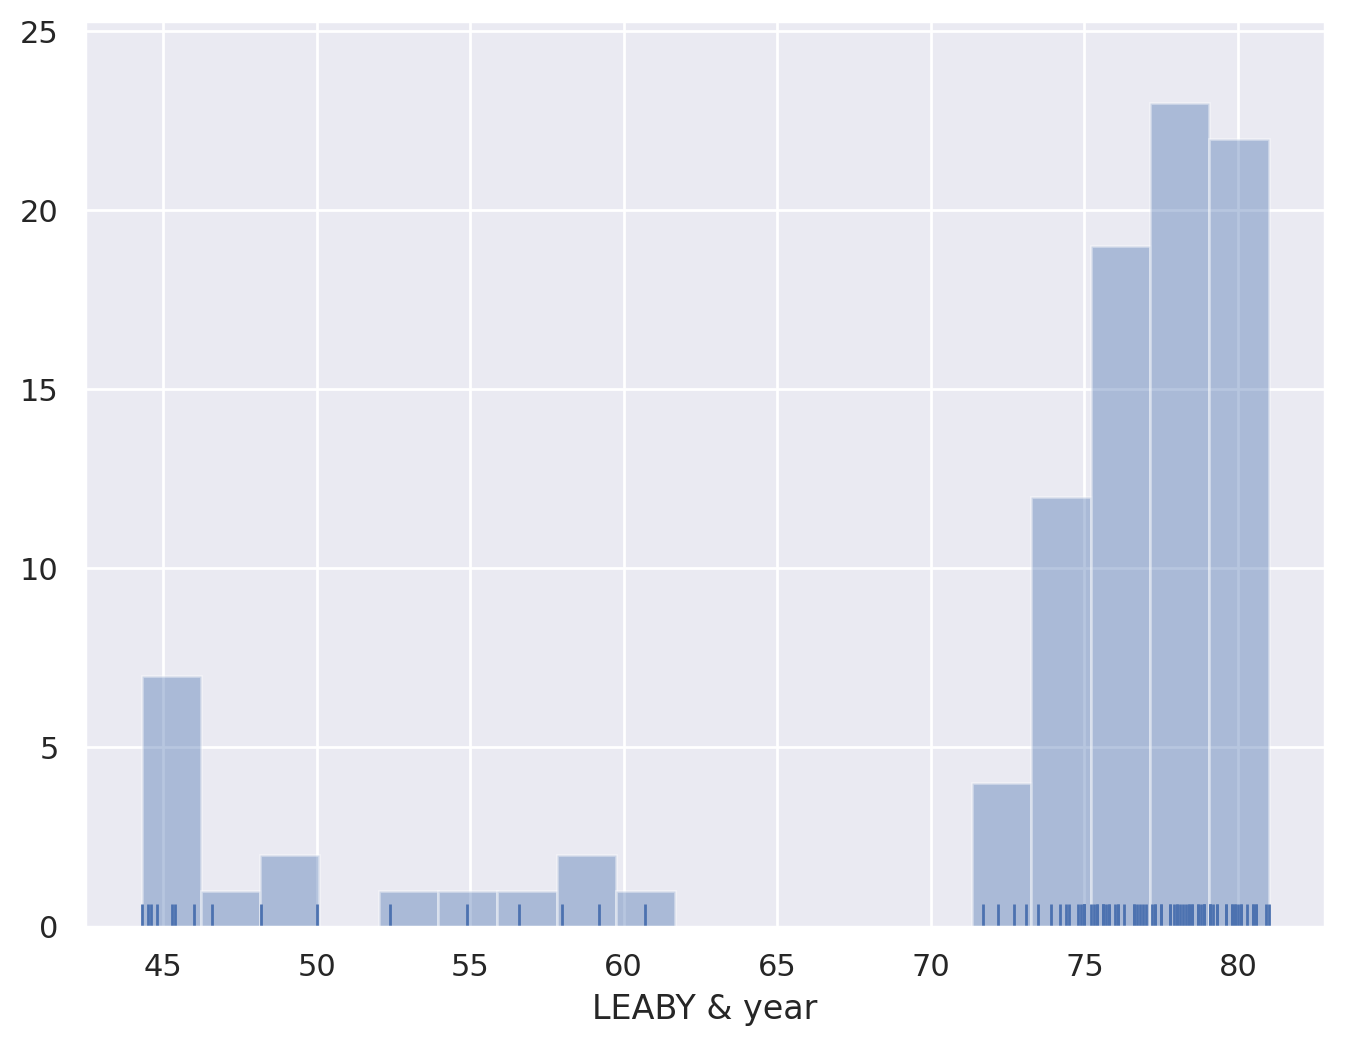

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df.LEABY, rug = True, kde=False)
plt.xlabel("LEABY & year");


left skewed. hm

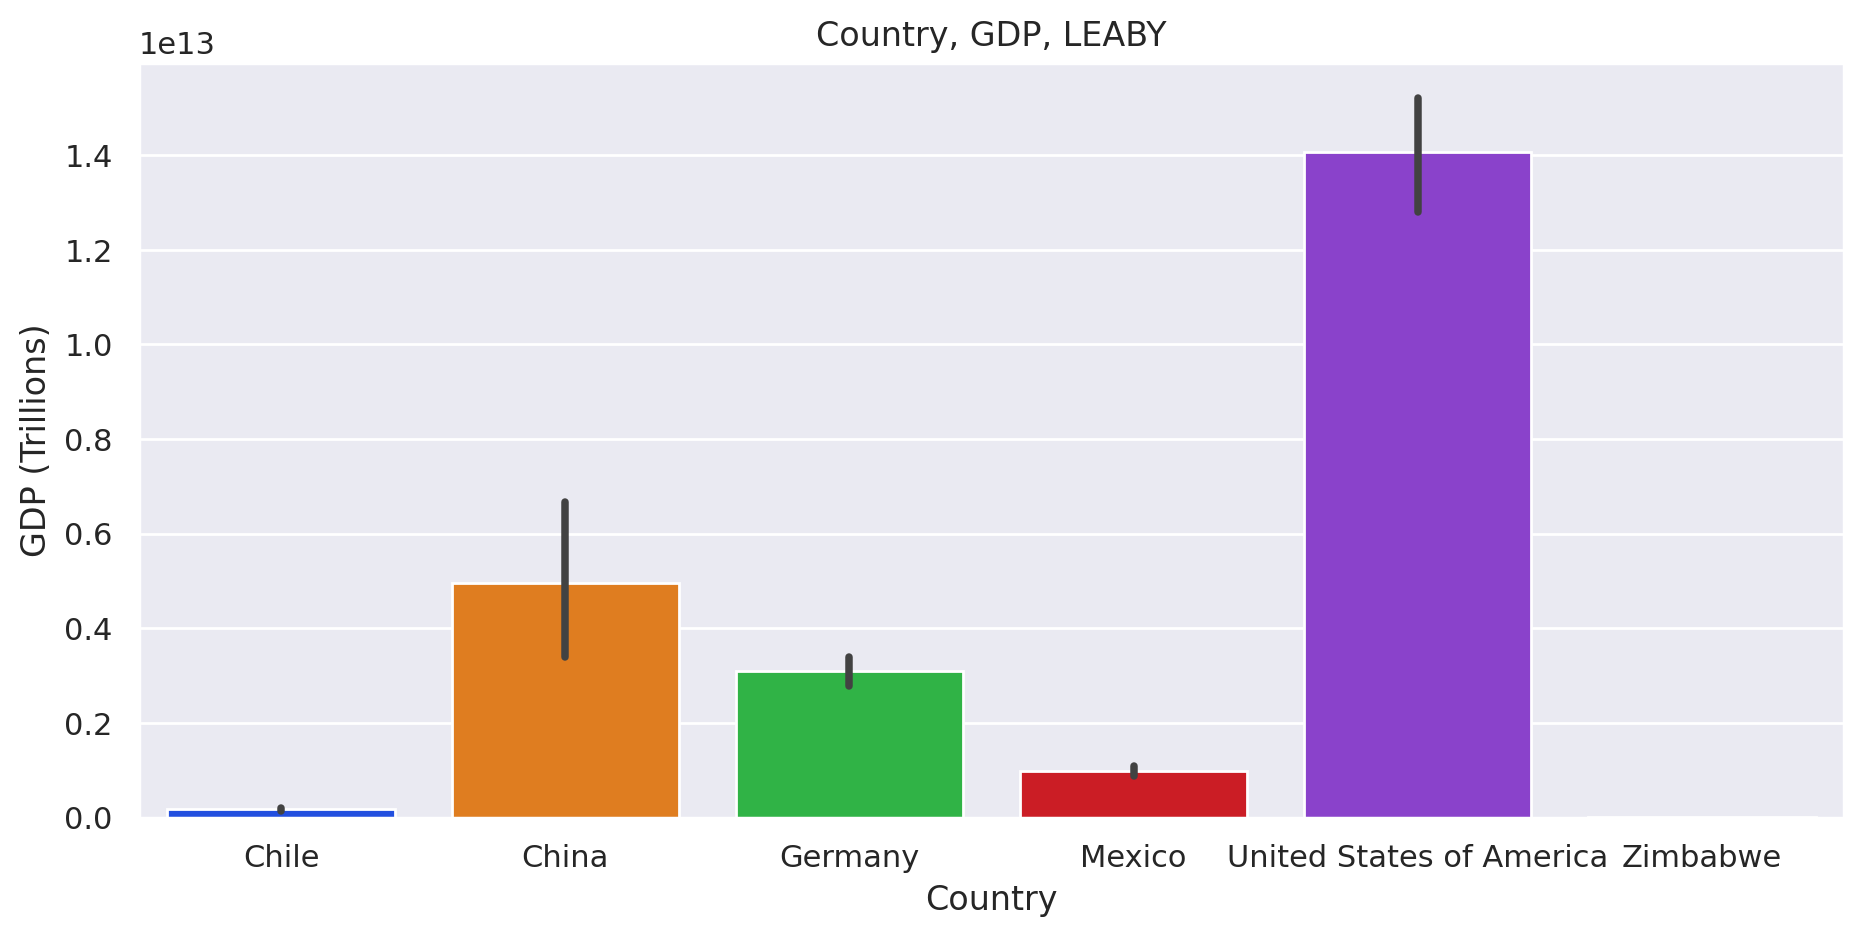

In [ ]:
sns.set_style = "dark grid"
plt.figure(figsize = (11,5))
ax = sns.barplot(x='Country', y='GDP', palette= "bright", data = df)
plt.xlabel('Country')
plt.ylabel('GDP (Trillions)')
plt.title('Country, GDP, LEABY')
plt.show()

LEABY and GDP, hue, country

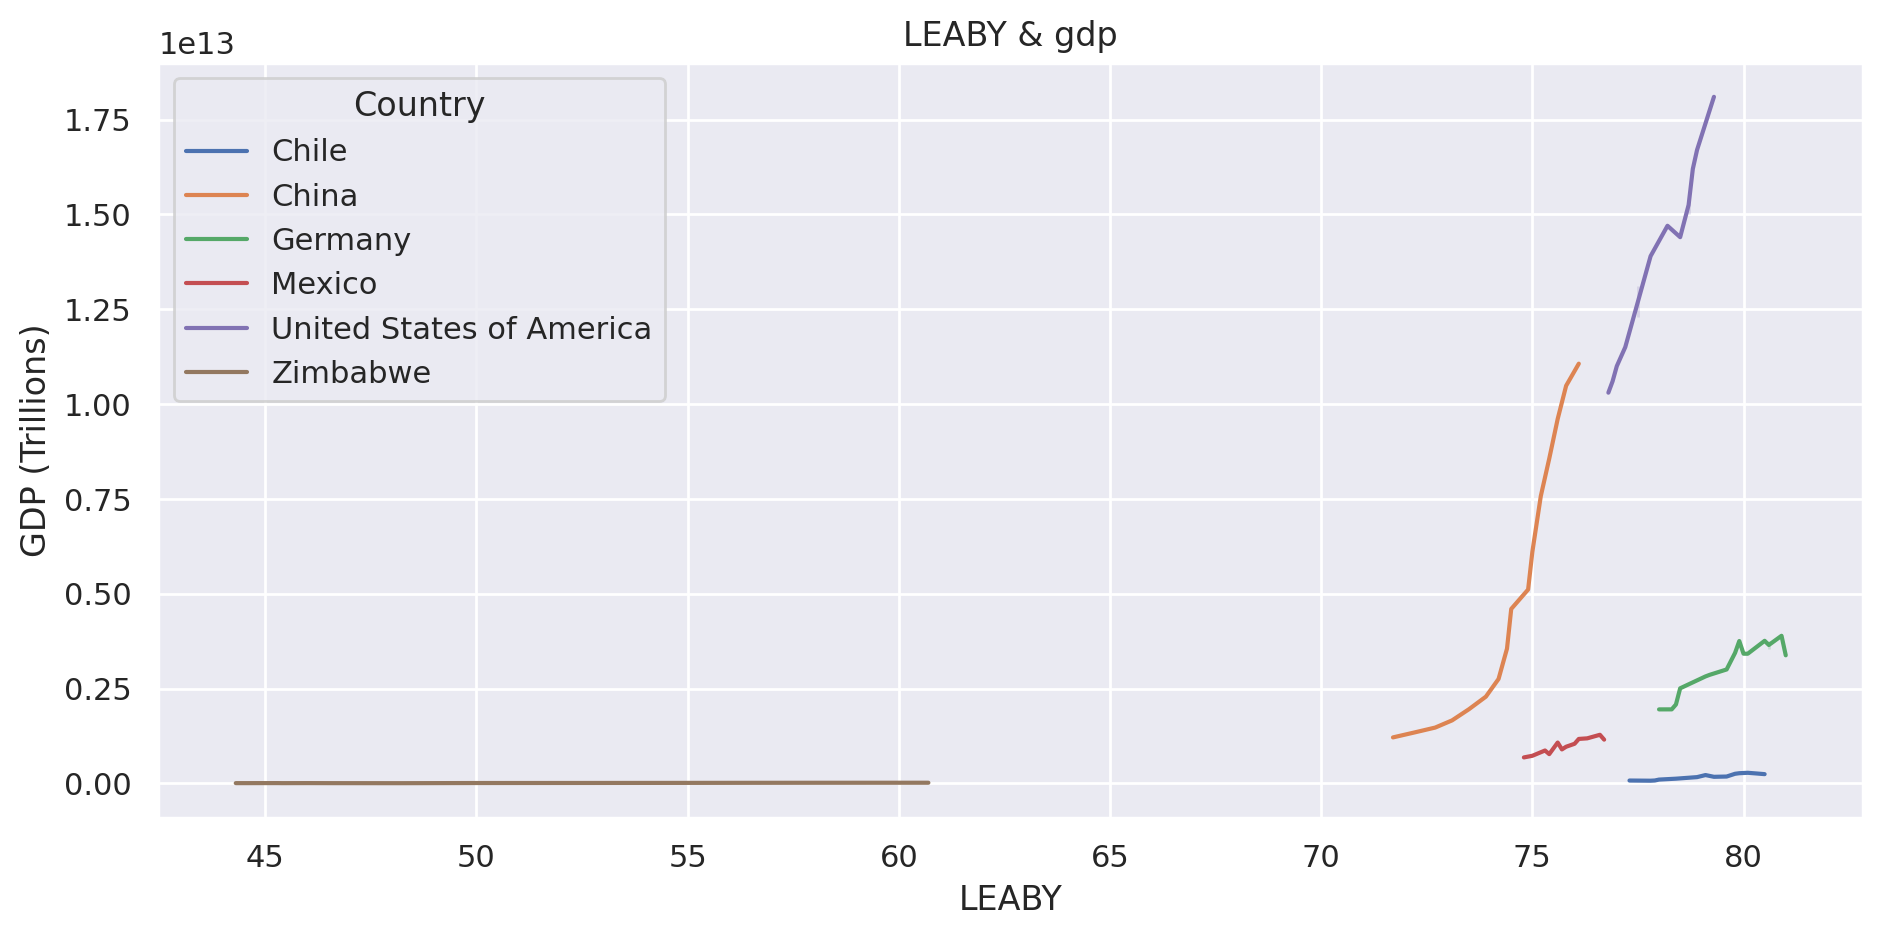

In [ ]:
plt.figure(figsize = (11,5))
sns.lineplot(x="LEABY", y="GDP", hue= "Country", data= df)
plt.xlabel('LEABY')
plt.ylabel('GDP (Trillions)')
plt.title('LEABY & gdp')
plt.show()

Histplot? Can't move legend. look into "no handles" error

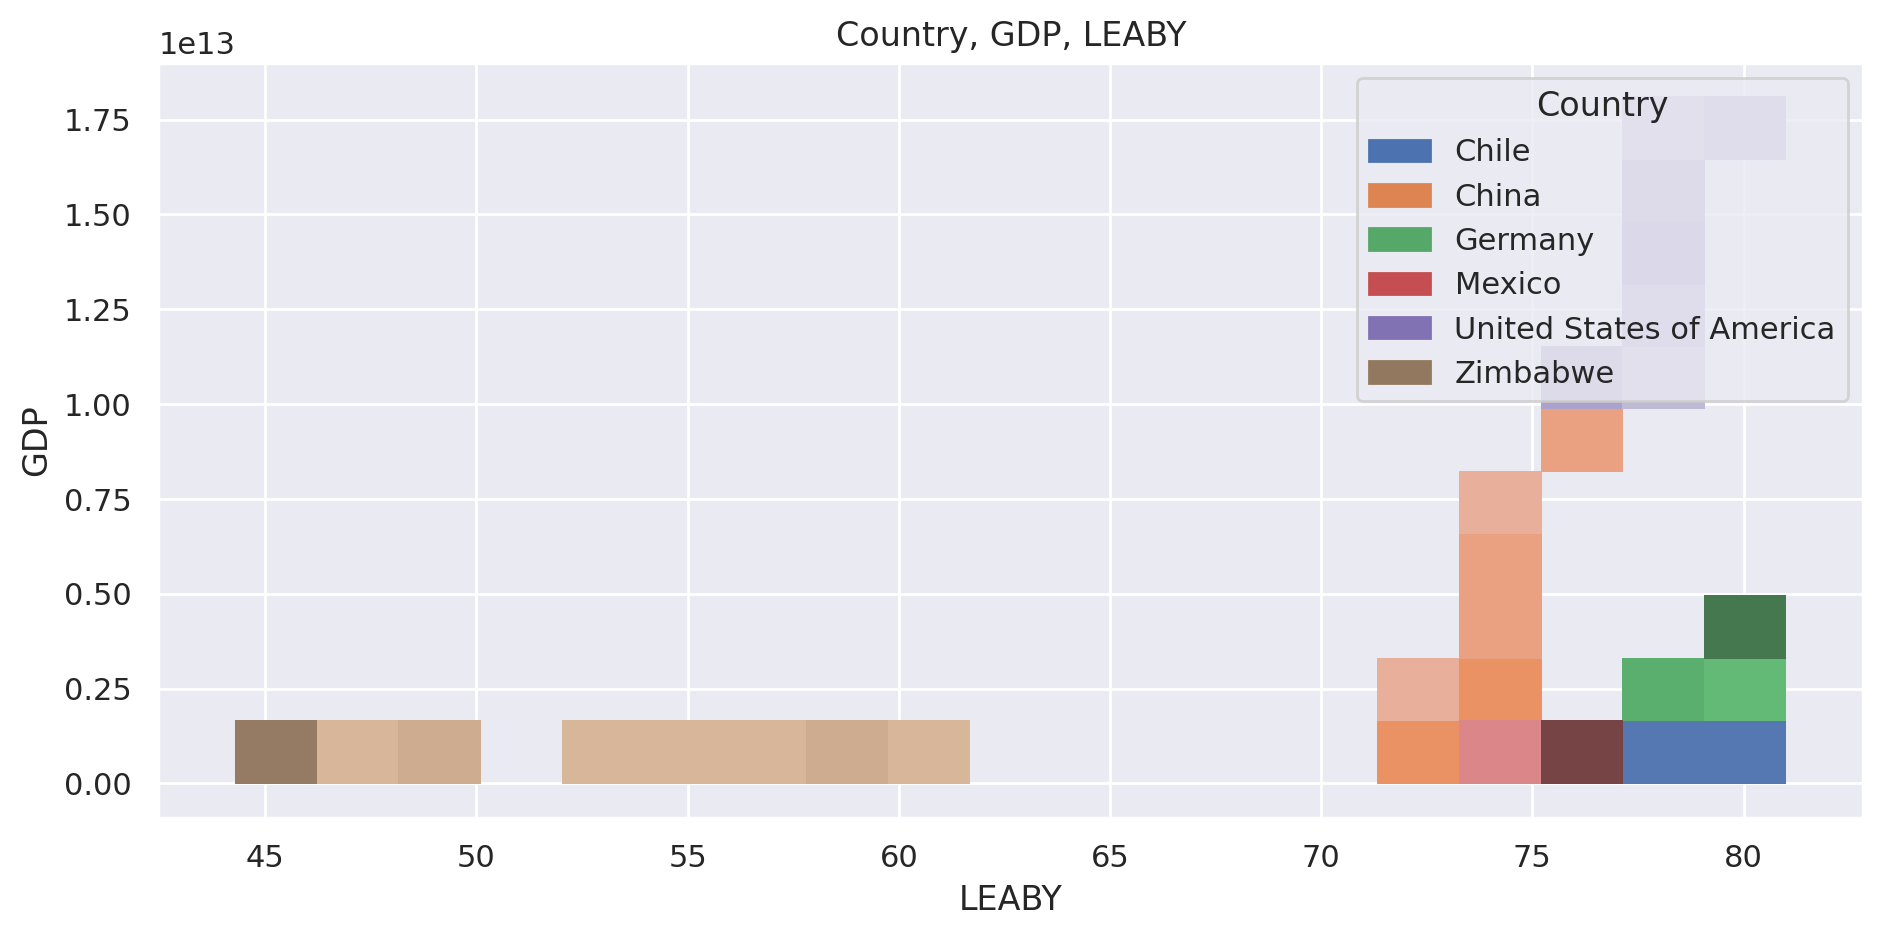

In [ ]:
sns.set_style = "ticks"
plt.figure(figsize = (11,5))
ax = sns.histplot(x='LEABY', y='GDP', hue='Country', data = df)
plt.xlabel('LEABY')
plt.ylabel('GDP')
plt.title('Country, GDP, LEABY')
#plt.legend(loc='center left')

#ax.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

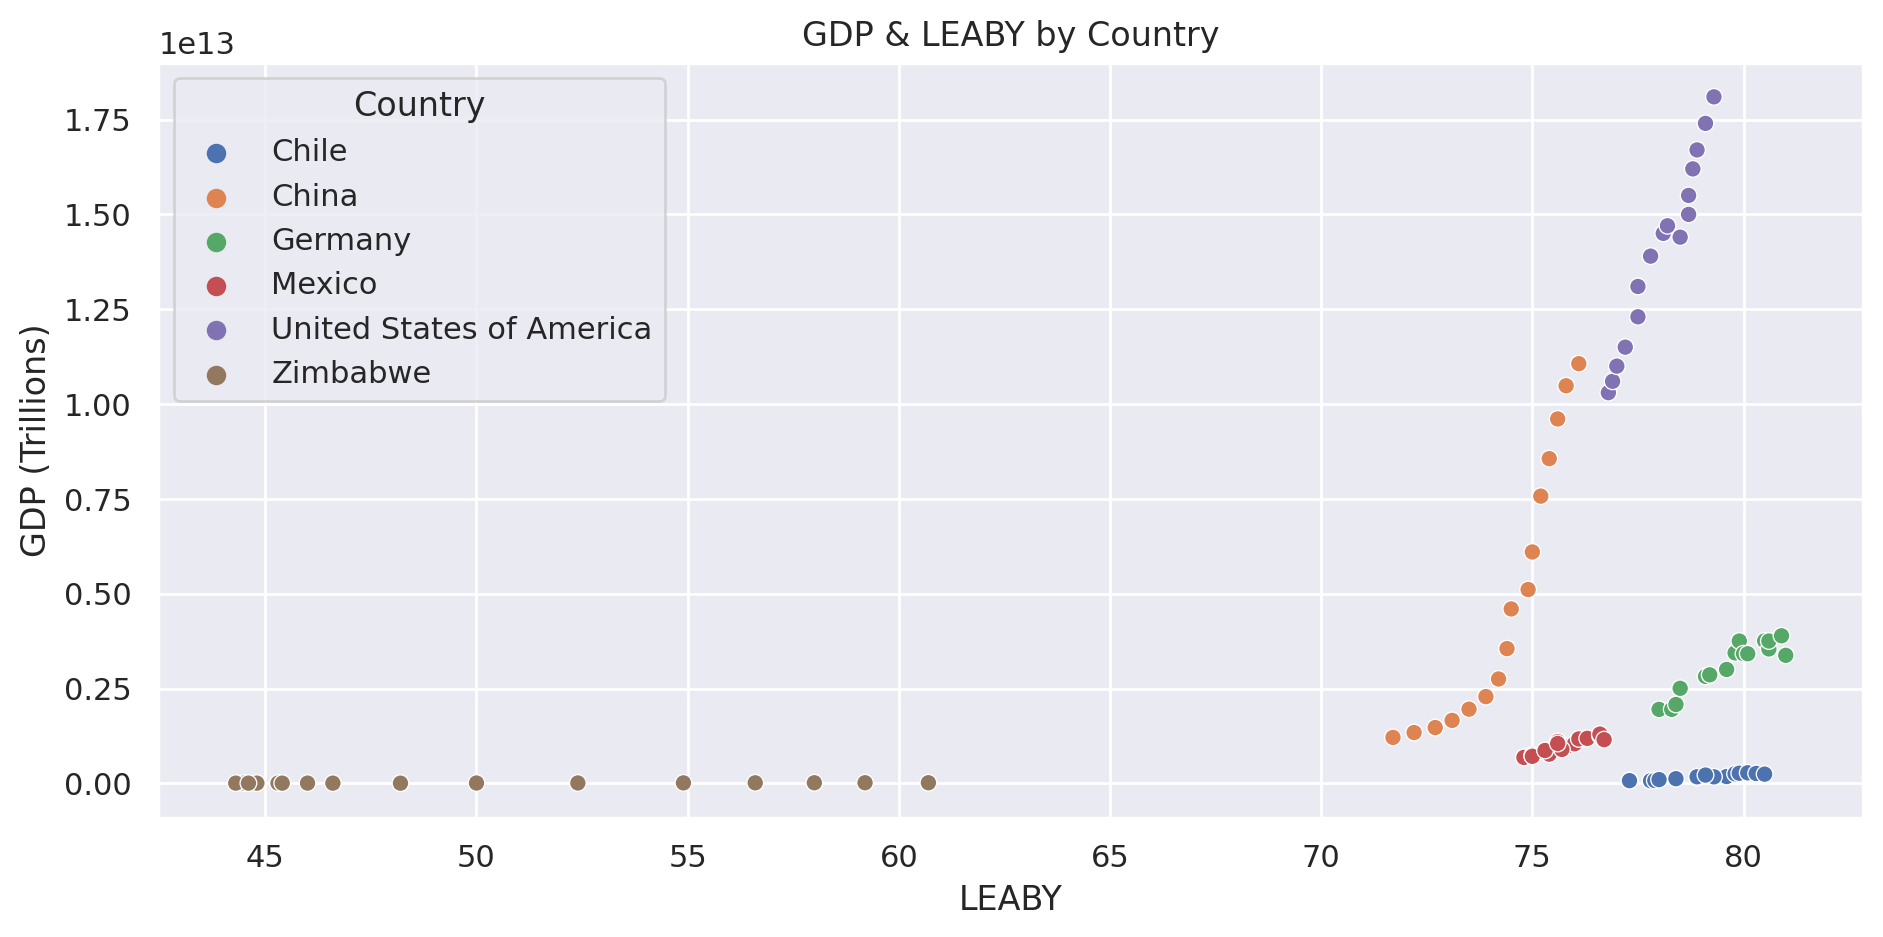

In [ ]:
sns.set_style = "ticks"
plt.figure(figsize = (11,5))
ax = sns.scatterplot(x='LEABY', y='GDP', hue="Country", data = df)
plt.xlabel('LEABY')
plt.ylabel('GDP (Trillions)')
plt.title('GDP & LEABY by Country')
plt.show()

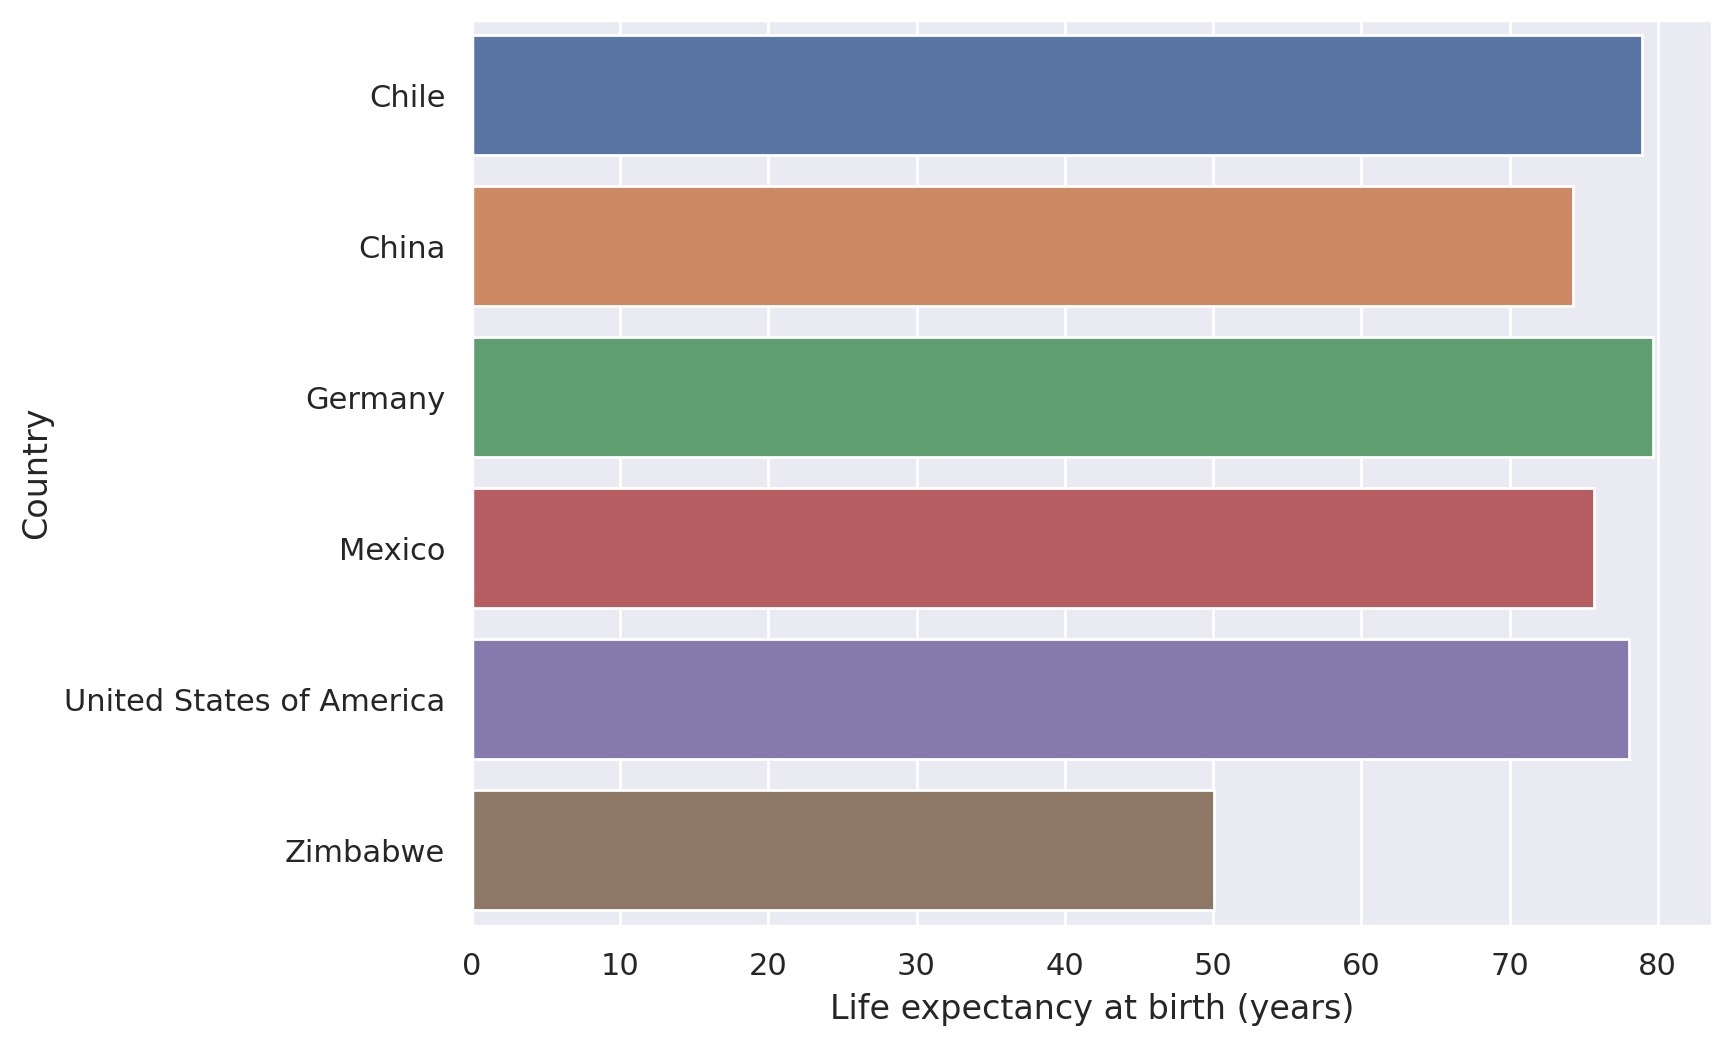

In [ ]:
#let's do a barplot
plt.figure(figsize=(8,6))
sns.barplot(x="LEABY", y="Country", data=df_means)
plt.xlabel("Life expectancy at birth (years)")
plt.show()

Has the GDP changed for the countries over time? (ie: Years)

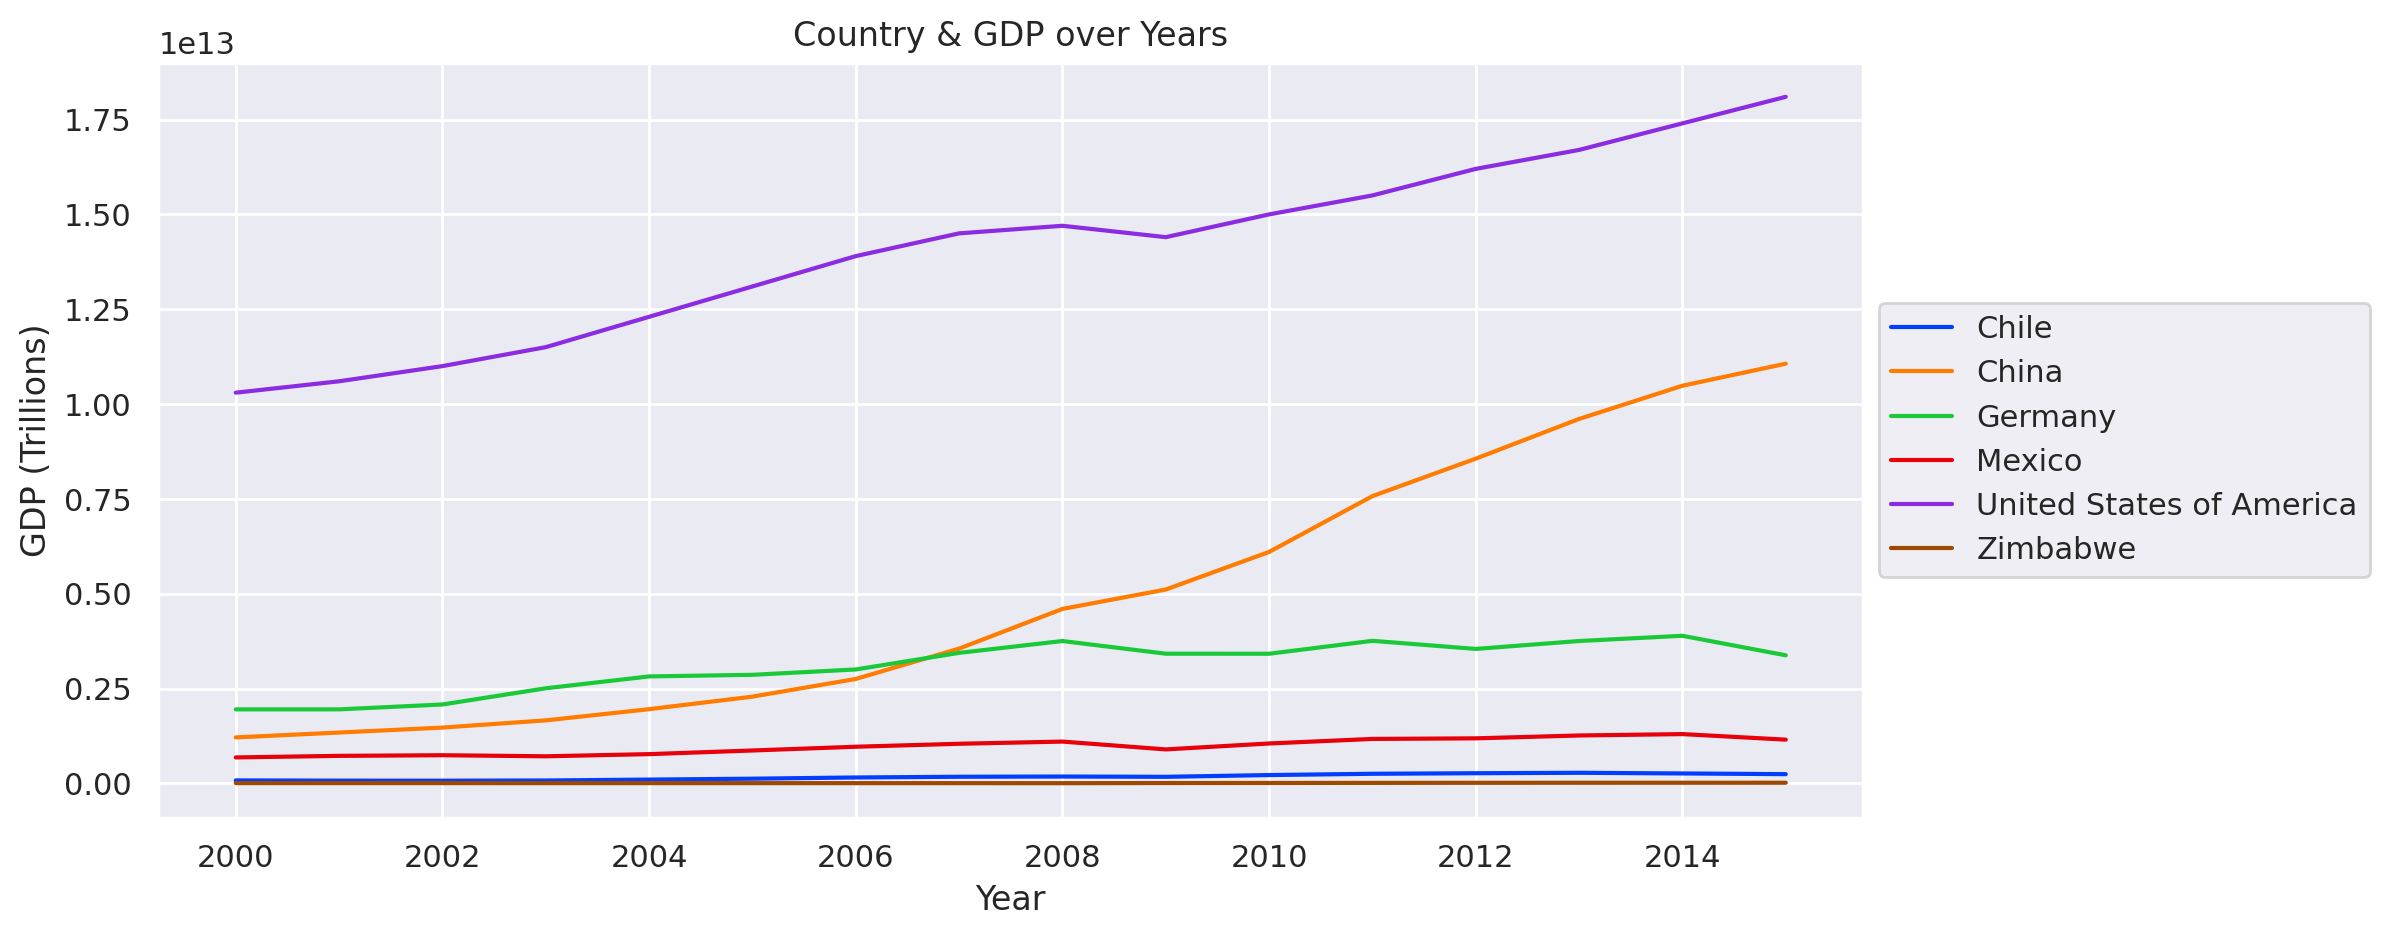

In [ ]:
plt.figure(figsize = (11,5))
sns.lineplot(x="Year", y="GDP", hue= "Country", palette = "bright", data= df)
plt.xlabel('Year')
plt.ylabel('GDP (Trillions)')
plt.title('Country & GDP over Years')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.show()

The US & China's GDP has changed the most over time. Chile & Zimbabwe's has been constant.

Let's see that as a bar plot

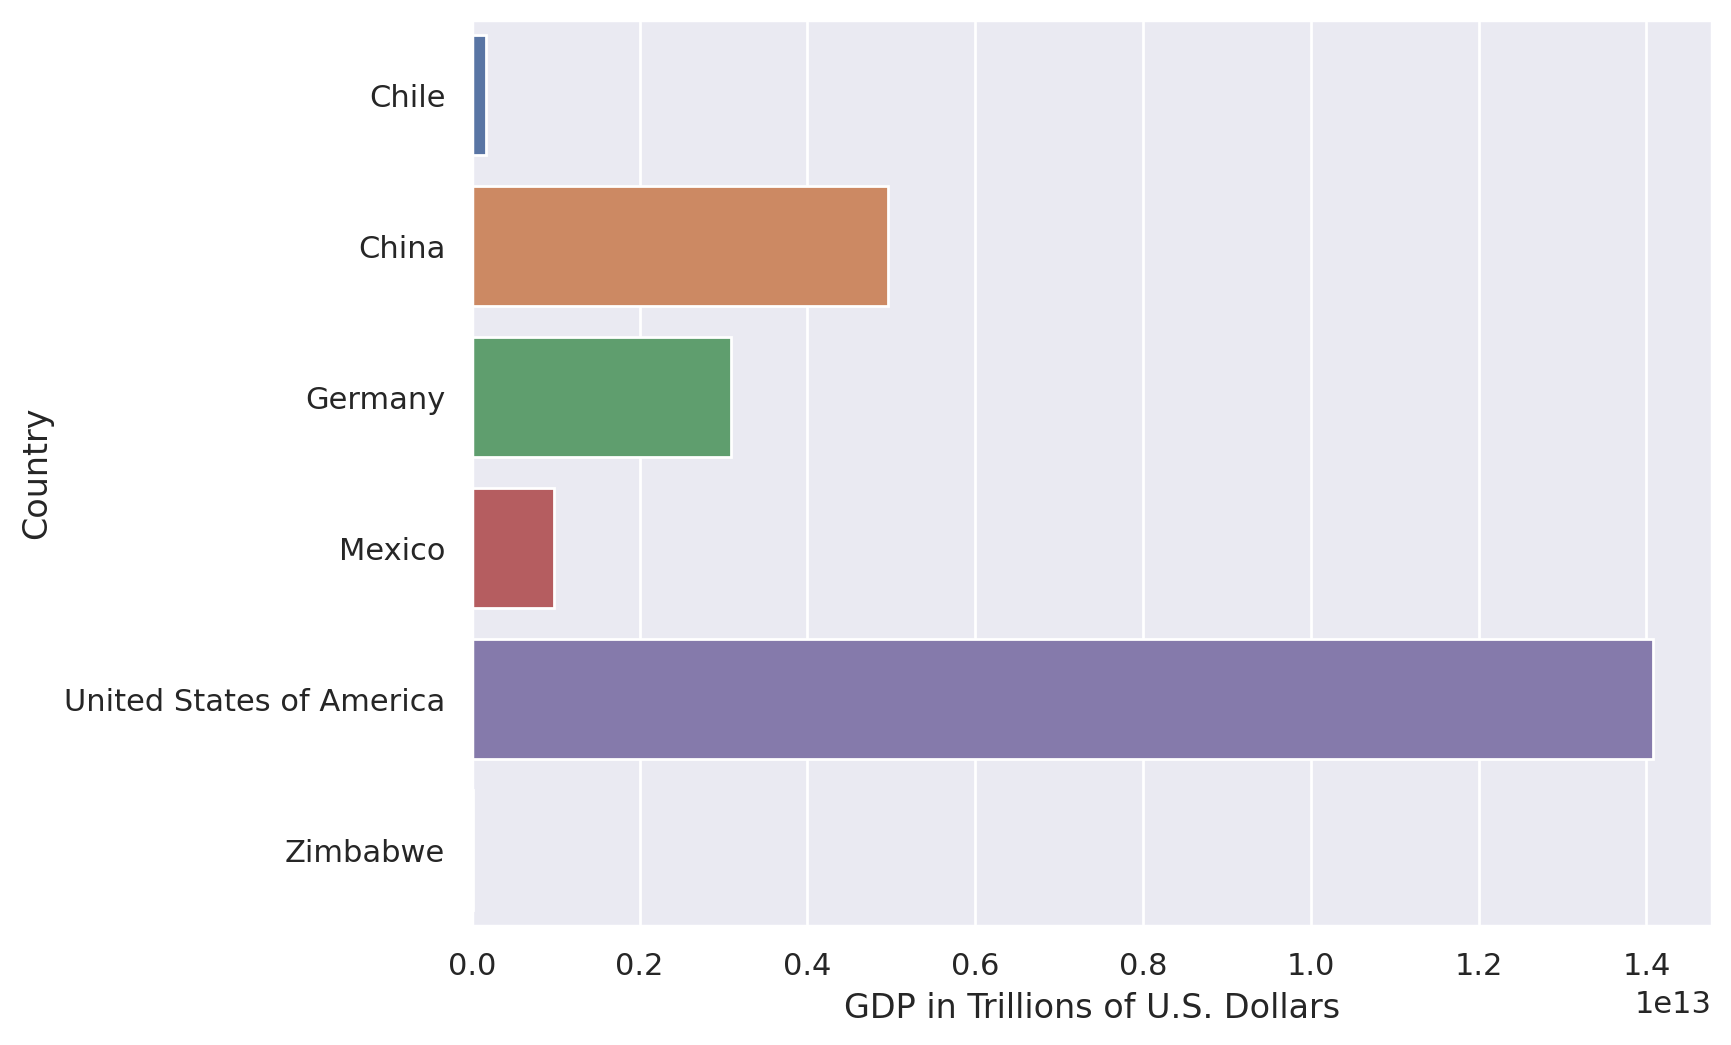

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=df_means)
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.show()

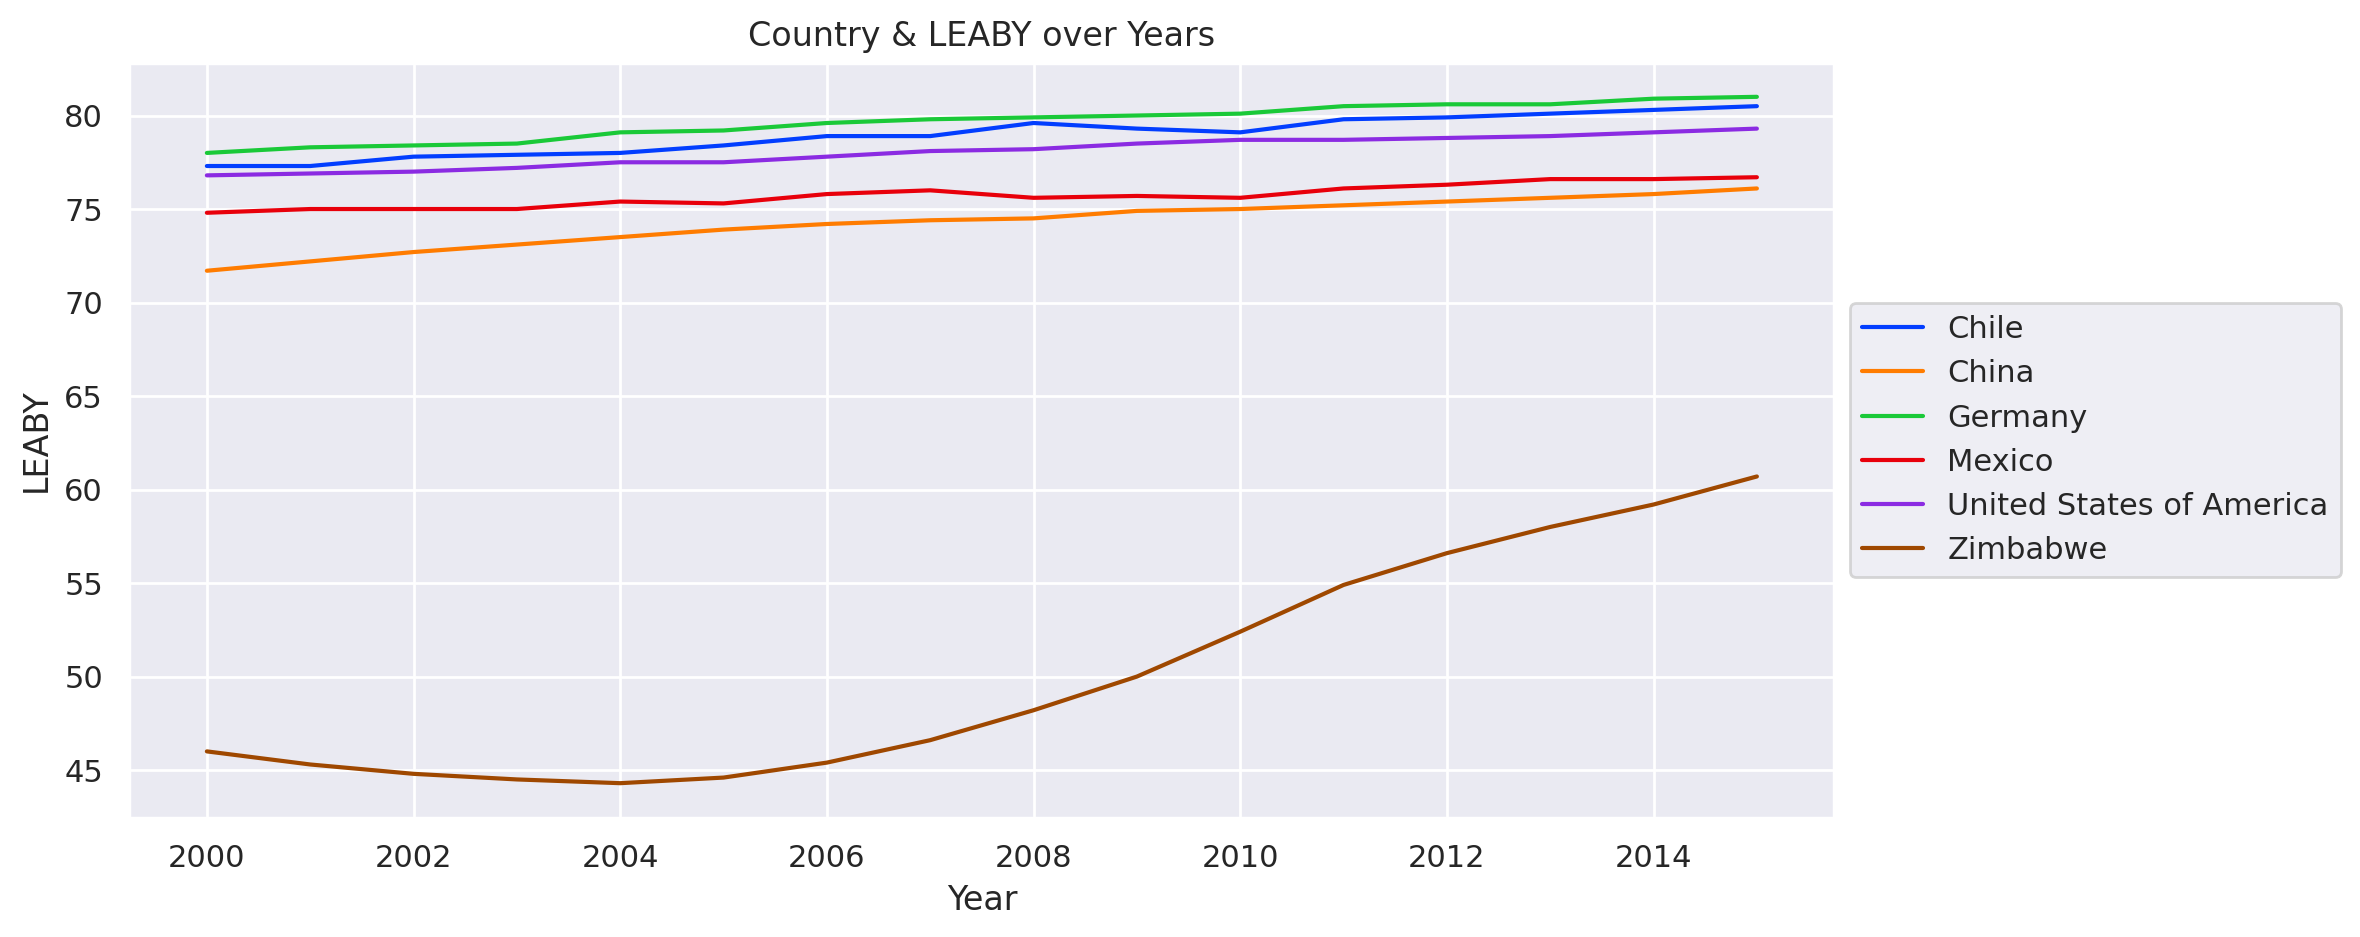

In [ ]:
#Life Expectacny over time
plt.figure(figsize = (11,5))
sns.lineplot(x="Year", y="LEABY", hue= "Country", palette = "bright", data= df)
plt.xlabel('Year')
plt.ylabel('LEABY')
plt.title('Country & LEABY over Years')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.show()

Zimbabwe's LEABY has changed the most over time!

Do some side by side comparisions with facetgrid.
write more explanations/observations

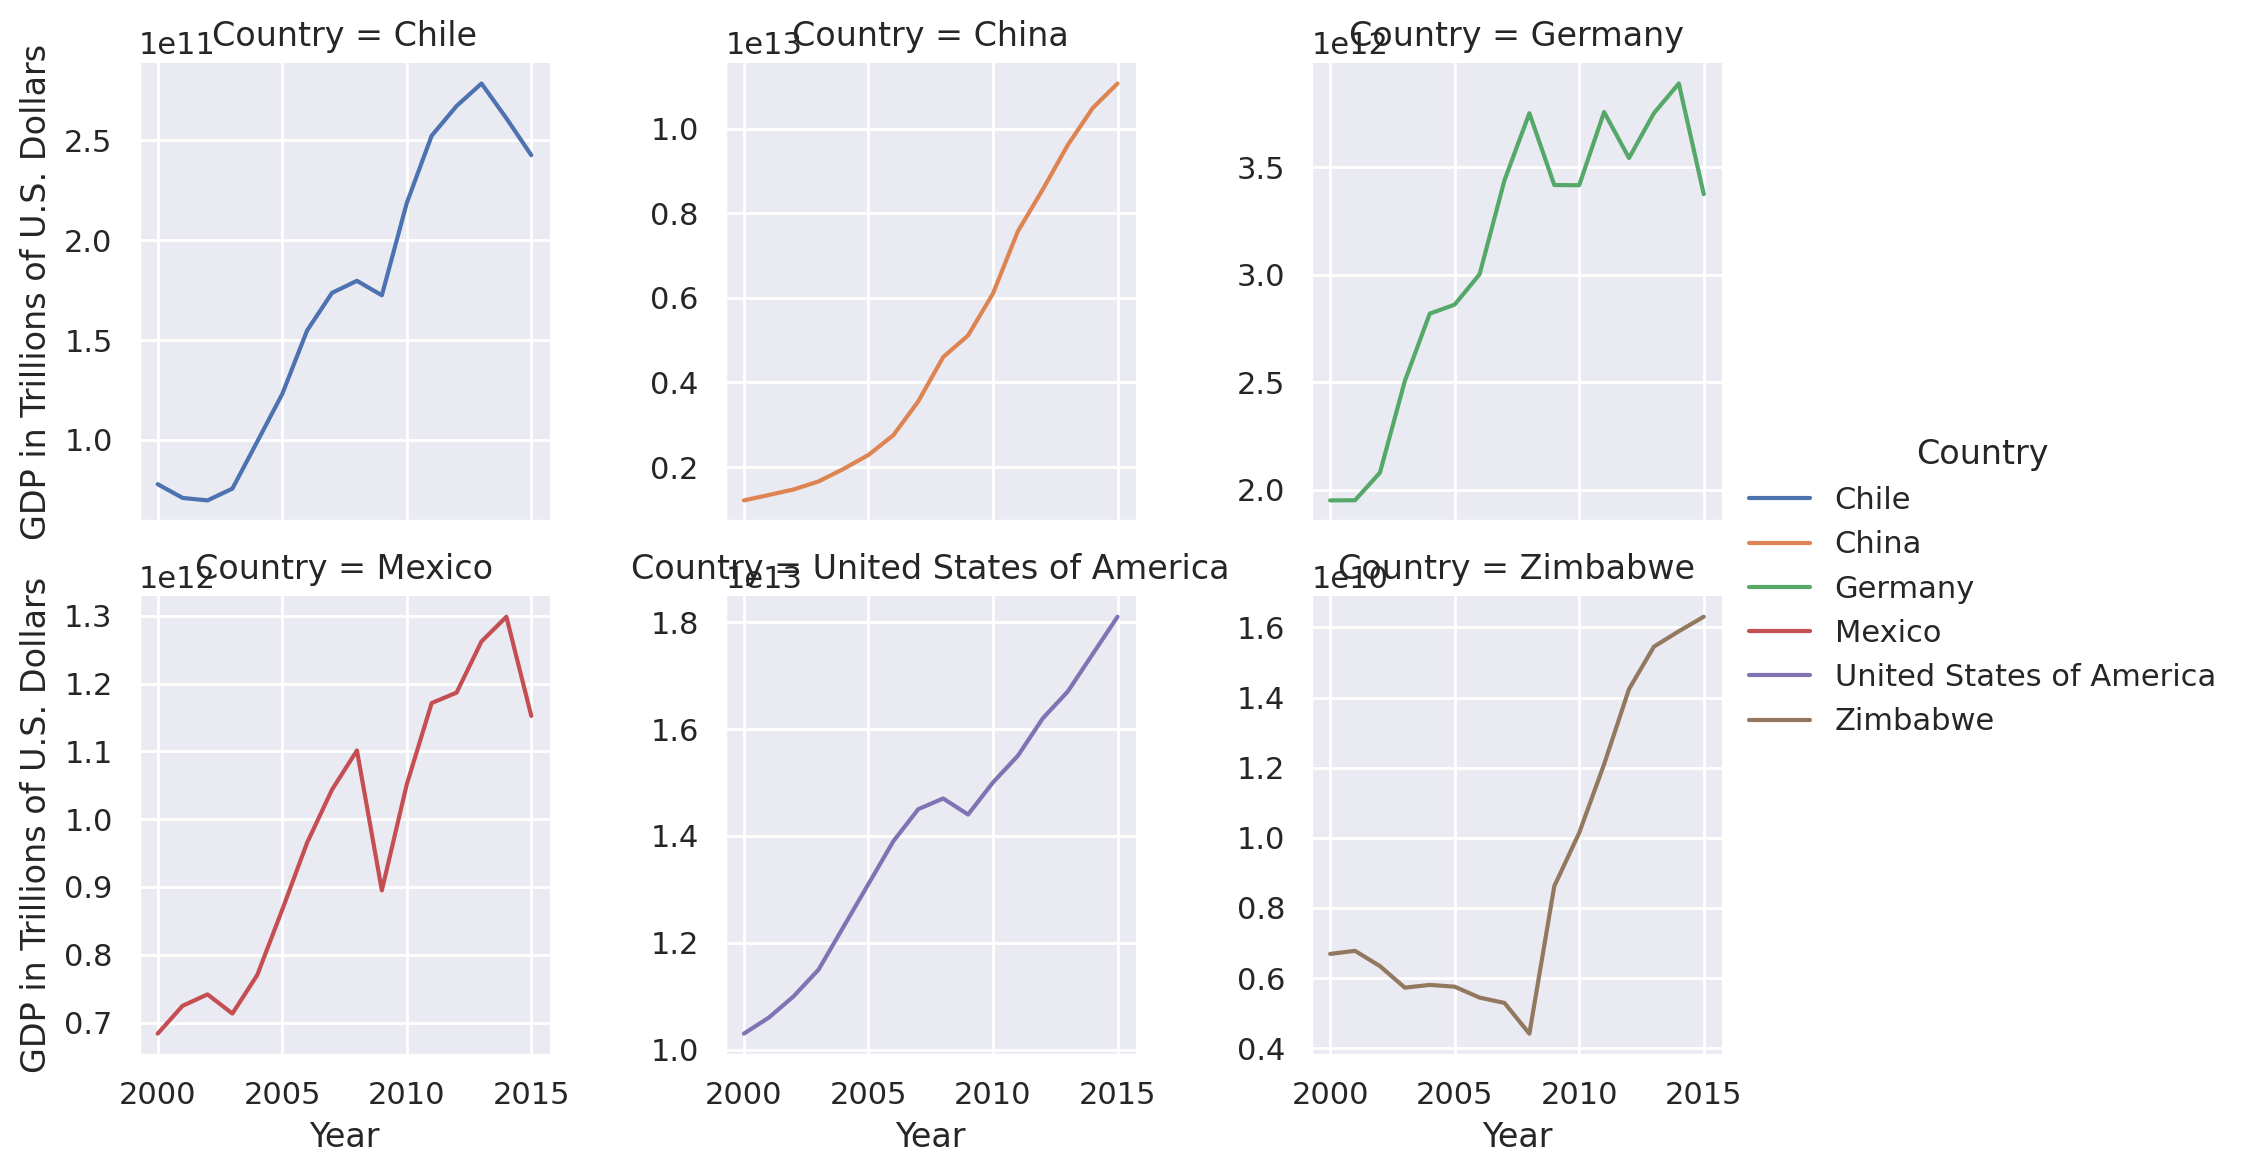

In [ ]:
GDPgraphs = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

GDPgraphs = (GDPgraphs.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

GDPgraphs
plt.show()

What did we find out?
Zimbabwe had the greatest change in LEABY of all the countries.